In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## 加载MNIST数据

In [4]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original',data_home='./datasets')
mnist

d:\program files\python367\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
d:\program files\python367\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [10]:
X,y=mnist['data'],mnist['target']
X.shape
y.shape

(70000, 784)

(70000,)

(-0.5, 27.5, 27.5, -0.5)

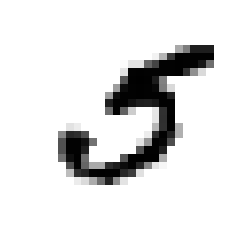

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

创建__训练集__与__测试集__

In [16]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
X_train.shape
y_train.shape

X_test.shape
y_test.shape

(60000, 784)

(60000,)

(10000, 784)

(10000,)

打乱__训练集__

In [18]:
import numpy as np

shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

## 训练一个二分器

__简化问题__，只尝试去识别一个数字

为该分类任务创建目标向量

In [20]:
y_train_5=y_train==5
y_test_5=y_test==5

y_train_5
y_test_5

array([False,  True, False, ..., False, False, False])

array([False, False, False, ..., False, False, False])

挑选一个分类器去训练它`SGDClassifter`
该分类器的好处
- 因为一次只处理一条数据
- 所以能够高效地处理非常大的数据集
- 适合在线学习

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
# 预测
sgd_clf.predict([some_digit])

array([ True])

## 对性能的评估

### 使用交叉验证测量准确性


实现自己版本的__交叉验证__，为了更多的控制权

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skflods=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skflods.split(X_train,y_train_5):
#     第一步：克隆模型
    clone_clf=clone(sgd_clf)    
    
#     第二步：用训练集的训练分类来训练模型
    x_train_flods=X_train[train_index]
    y_train_flods=y_train_5[train_index]
    clone_clf.fit(x_train_flods,y_train_flods)
    
#     第三步：用模型预测测试集得到测试结果
    x_test_flod=X_train[test_index]
    y_pred=clone_clf.predict(x_test_flod)
    
#     第四步：将测试结果与测试分类进行对比，并算出性能
    y_test_flod=y_train_5[test_index] 
    n_correct=sum(y_pred==y_test_flod)
    print(n_correct/len(y_pred))

d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

0.9659


d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

0.96105


d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

0.968


使用scikit-learn的`cross_val_score`来评估`SGDClassifier`模型

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')


d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max

array([0.9659 , 0.96105, 0.968  ])

### 混淆矩阵
大体思路如下：
- 输出类别A被分类成类别B的次数
 - 例：为了知道分类器将5误分成3的次数，你需要查看混淆矩阵的第五行第三列
- 将一系列的__预测值__与__真实值__做比较
- 使用`cross_val_predict()`函数来进行模型预测

In [31]:
from sklearn.model_selection import cross_val_predict

y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_predict

d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
d:\program files\python367\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max

array([False,  True, False, ..., False, False, False])

使用`confusion_matrix()`函数，得到一个混淆矩阵

混淆矩阵中的每一行表示一个__实际的类__，每一列表示一个__预测的类__

第一行认__非5__中的__53891__张被正确归类为__非5__，而其余__688__张被错误归类为__是5__类

第二行认为__是5__中的__1413__张被错误志归类为__非5__，其余__4008__张正确分类为__是5__类

该例为一个二分类，所以结果为一个2x2的矩阵
- 第一个实际分类为__非5__，第一行表示
- 第二个实际分类为__是5__，第二行表示
- 第一个预测分类为__非5__，第一列表示
- 第二个预测分类为__是5__，第二列表示

$$\begin{bmatrix}实非5+预非5=归正确&实非5+预是5=归错误\\实是5+预非5=归错误&实是5+预是5=归正确   \end{bmatrix}$$

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)


array([[53891,   688],
       [ 1413,  4008]], dtype=int64)